# Homework 2

Visualize, describe, and model distributions

Allen Downey

[MIT License](https://en.wikipedia.org/wiki/MIT_License)

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

from utils import decorate
from thinkstats2 import Pmf, Cdf

import thinkstats2
import thinkplot

Here are some of the functions from Chapter 5.

In [2]:
def MakeNormalModel(values, label=''):
    """Plots a CDF with a Normal model.

    values: sequence
    """
    cdf = thinkstats2.Cdf(values, label=label) #plots percentile of values

    mean, var = thinkstats2.TrimmedMeanVar(values)
    std = np.sqrt(var)
    print('n, mean, std', len(values), mean, std)

    xmin = mean - 4 * std
    xmax = mean + 4 * std

    xs, ps = thinkstats2.RenderNormalCdf(mean, std, xmin, xmax)
    thinkplot.Plot(xs, ps, label='model', linewidth=4, color='0.8')
    thinkplot.Cdf(cdf)

In [3]:
def MakeNormalPlot(values, label=''):
    """Generates a normal probability plot.

    values: sequence
    """
    mean, var = thinkstats2.TrimmedMeanVar(values, p=0.01)
    std = np.sqrt(var)

    xs = [-5, 5]
    xs, ys = thinkstats2.FitLine(xs, mean, std)
    thinkplot.Plot(xs, ys, color='0.8', label='model')

    xs, ys = thinkstats2.NormalProbability(values)
    thinkplot.Plot(xs, ys, '+', alpha=0.3, label=label)

Read the GSS data again.

In [4]:
%time gss = pd.read_hdf('gss.hdf5', 'gss')
gss.shape

CPU times: user 250 ms, sys: 163 ms, total: 412 ms
Wall time: 853 ms


(62466, 101)

In [5]:
gss.head()

,year,id_,agewed,divorce,sibs,childs,age,educ,paeduc,maeduc,...,memchurh,realinc,cohort,marcohrt,ballot,wtssall,adults,compuse,databank,wtssnr
0,1972,167,0,0,2,0,26.0,18.0,12,12,...,0,13537.0,1946.0,0,0,0.8893,2.0,0,0,1.0
1,1972,1256,30,2,0,1,38.0,12.0,97,99,...,0,18951.0,1934.0,1964,0,0.4446,1.0,0,0,1.0
2,1972,415,0,0,7,0,57.0,12.0,7,7,...,0,30458.0,1915.0,0,0,1.3339,3.0,0,0,1.0
3,1972,234,18,1,6,3,61.0,14.0,8,5,...,0,37226.0,1911.0,1929,0,0.8893,2.0,0,0,1.0
4,1972,554,22,2,3,3,59.0,12.0,6,11,...,0,30458.0,1913.0,1935,0,0.8893,2.0,0,0,1.0


Most variables use special codes to indicate missing data.  We have to be careful not to use these codes as numerical data; one way to manage that is to replace them with `NaN`, which Pandas recognizes as a missing value.

In [6]:
def replace_invalid(df):
    df.realinc.replace([0], np.nan, inplace=True)                  
    df.educ.replace([98,99], np.nan, inplace=True)
    # 89 means 89 or older
    df.age.replace([98, 99], np.nan, inplace=True) 
    df.cohort.replace([9999], np.nan, inplace=True)
    df.adults.replace([9], np.nan, inplace=True)

replace_invalid(gss)

### Distribution of age

Here's the CDF of ages.

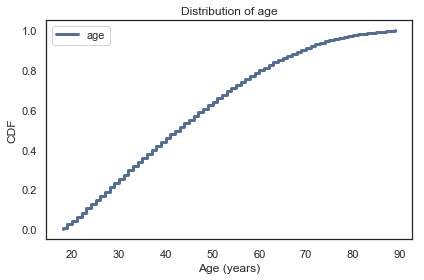

In [8]:
cdf_age = Cdf(gss.age)
thinkplot.cdf(cdf_age, label='age')

decorate(title='Distribution of age', 
         xlabel='Age (years)', 
         ylabel='CDF')

**Exercise**:  Each of the following cells shows the distribution of ages under various transforms, compared to various models.  In each text cell, add a sentence or two that interprets the result.  What can we say about the distribution of ages based on each figure?

1) Here's the CDF of ages compared to a normal distribution with the same mean and standard deviation.

Interpretation:

n, mean, std 62281 44.47905368874617 16.482037485676


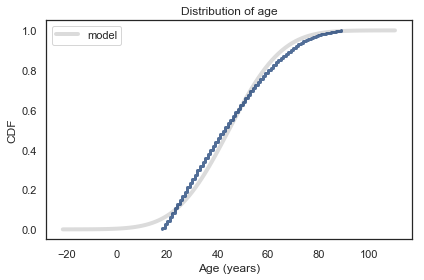

In [9]:
MakeNormalModel(gss.age.dropna(), label='')

decorate(title='Distribution of age', 
         xlabel='Age (years)', 
         ylabel='CDF')

Daphka: Based on the overlay of the two figures, you can see that age models very closely the behavior of a normal distribution.

2) Here's a normal probability plot for the distribution of ages.

Interpretation:

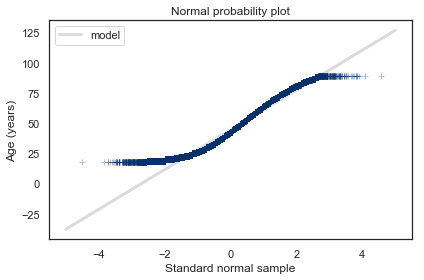

In [10]:
MakeNormalPlot(gss.age.dropna(), label='')

decorate(title='Normal probability plot', 
         xlabel='Standard normal sample', 
         ylabel='Age (years)')

Daphka: The Normal Probability Plot comfirms exactly that by showing that between -2 and 2 standard deviation from the mean, we can observe that values from age would fit the model for a normal distribution. However, the tail behaviors deviate slightly from the model possibly due to the fact that fewer people younger than 20 or older than 80 were interviewed and therefore behave like outliers in the dataset.

3) Here's the complementary CDF on a log-y scale.

Interpretation:

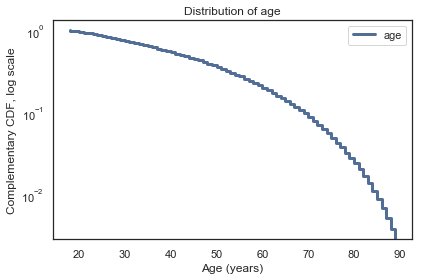

In [11]:
thinkplot.cdf(cdf_age, label='age', complement=True)

decorate(title='Distribution of age', 
         xlabel='Age (years)', 
         ylabel='Complementary CDF, log scale',
         yscale='log')

Daphka: Once again, the log y validates that the dataset is probably from a normal distribution. Because at 20, which is truly where the percentile rank is 0 (assuming we didn't interview people much younger for the most part), we know the cdf of the different age values would increase as the percentile rank increases, therefore making the CDDF decrease at a similar rate and by taking the log this value will be decreasing as shown above.

4) Here's the CDF of ages on a log-x scale.

Interpretation:

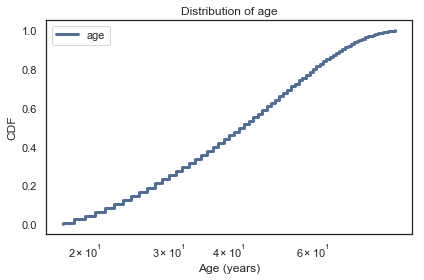

In [12]:
thinkplot.cdf(cdf_age, label='age')

decorate(title='Distribution of age', 
         xlabel='Age (years)', 
         ylabel='CDF',
         xscale='log')

Daphka: By looking at the data on a log x scale, we can see that the data resembles the sigmoid shape but with a wider tail, meaning more deviation potentially, however, it still resembles a normal distribution.

5) Here's the CDF of the logarithm of ages, compared to a normal model.

Interpretation:

n, mean, std 62281 1.6168744157503179 0.1678791432891678


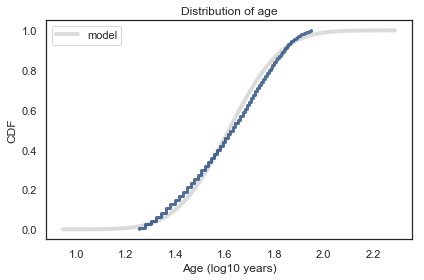

In [13]:
values = np.log10(gss.age.dropna())
MakeNormalModel(values, label='')

decorate(title='Distribution of age', 
         xlabel='Age (log10 years)', 
         ylabel='CDF')

Daphka: By taking the log of the x-values, one can observe that the distribution fits just as well the model of the lognormal distribution. One can hypothesize that the distribution may be lognormal since taking the log of the x-values makes the shape slightly more curvy.

6) Here's a normal probability plot for the logarithm of ages.

Interpretation:

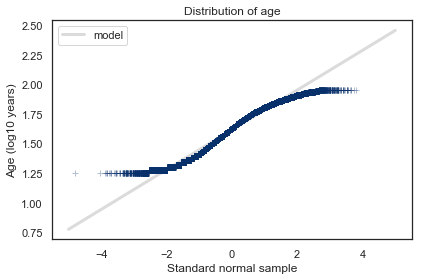

In [14]:
MakeNormalPlot(values, label='')

decorate(title='Distribution of age', 
         xlabel='Standard normal sample', 
         ylabel='Age (log10 years)')

Daphka: The normal for probability plot shows that most of the data do fit on the 45 degree line. However, there's more deviation in the tail than previously.

7) Here's the complementary CDF on a log-log scale.

Interpretation:

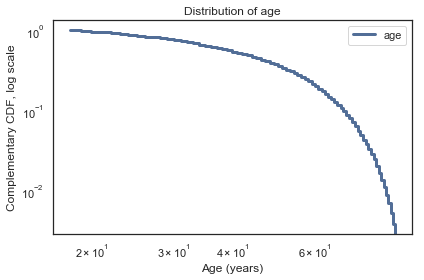

In [15]:
thinkplot.cdf(cdf_age, label='age', complement=True)

decorate(title='Distribution of age', 
         xlabel='Age (years)', 
         ylabel='Complementary CDF, log scale',
         xscale='log',
         yscale='log')

Daphka: Plotting the CCDF on a log-log scale is usually a strong indicator of whether a dataset follows a Pareto distribution. However, if a dataset follow a pareto distribution, we expect to see a linear pattern. As can be seen above, the dataset for ages does not follow a Pareto distribution. It resembles more closely a normal/lognormal distribution on a log-log scale.

My conclusion using the different scales is that the data is most likely from a normal distribution.

8) Here's a test to see whether ages are well-modeled by a Weibull distribution.

Interpretation:

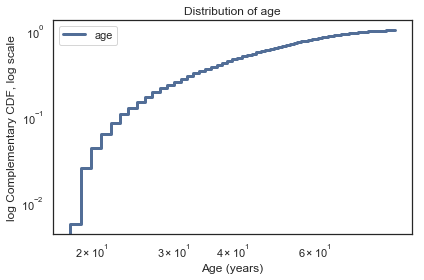

In [16]:
thinkplot.cdf(cdf_age, label='age', transform='Weibull')

decorate(title='Distribution of age', 
         xlabel='Age (years)', 
         ylabel='log Complementary CDF, log scale',
         xscale='log',
         yscale='log')

Daphka: We expect to see a linear pattern for a Weibull distribution on a log-log y and log x scale. Since ages is not linear, we can assume that it doesn't follow a Weibull distribution.

### Distribution of income

Here's the CDF of `realinc`.

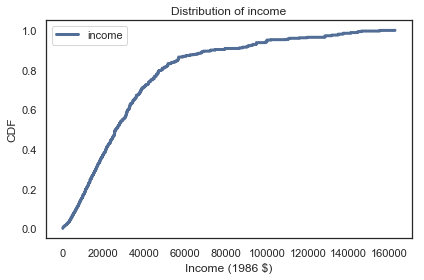

In [17]:
cdf_realinc = Cdf(gss.realinc)
thinkplot.cdf(cdf_realinc, label='income')

decorate(title='Distribution of income', 
         xlabel='Income (1986 $)', 
         ylabel='CDF')

**Exercise:** Use visualizations like the ones in the previous exercise to see whether there is an analytic model that describes the distribution of `gss.realinc` well.

n, mean, std 55499 33.8825218130748 28.502895120969335


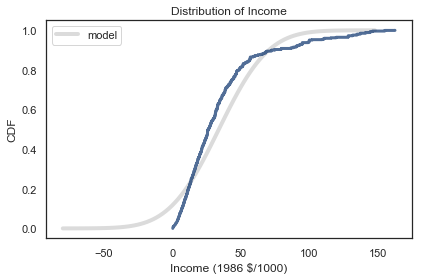

In [18]:
realIncValues = gss.realinc.dropna()/1000
MakeNormalModel(realIncValues, label='')

decorate(title='Distribution of Income', 
         xlabel='Income (1986 $/1000)', 
         ylabel='CDF')

2) Here's a normal probability plot for the values.

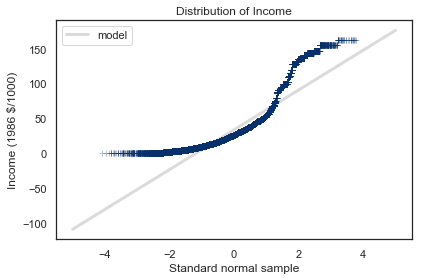

In [19]:
MakeNormalPlot(realIncValues, label='')

decorate(title='Distribution of Income', 
         xlabel='Standard normal sample', 
         ylabel='Income (1986 $/1000)')

3) Here's the complementary CDF on a log-y scale.

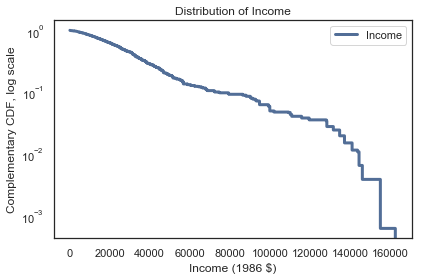

In [20]:
thinkplot.cdf(cdf_realinc, label='Income', complement=True)

decorate(title='Distribution of Income', 
         xlabel='Income (1986 $)', 
         ylabel='Complementary CDF, log scale',
         yscale='log')

4) Here's the CDF on a log-x scale.

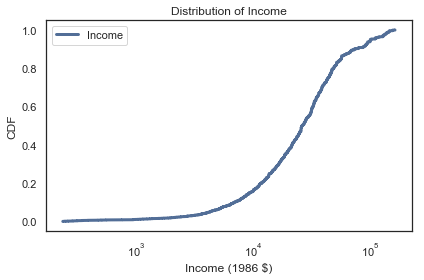

In [21]:
thinkplot.cdf(cdf_realinc, label='Income')

decorate(title='Distribution of Income', 
         xlabel='Income (1986 $)', 
         ylabel='CDF',
         xscale='log')

5) Here's the CDF of the logarithm of the values, compared to a normal model.

n, mean, std 55499 3.17994308944912 0.8880150298726985


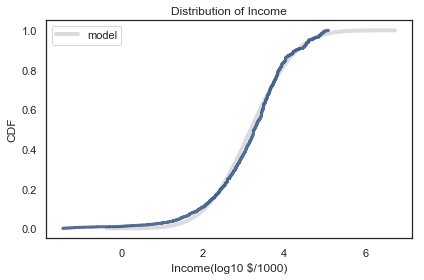

In [22]:
logIncValues = np.log(realIncValues)
MakeNormalModel(logIncValues, label="")

decorate(title='Distribution of Income', 
         xlabel='Income(log10 $/1000)', 
         ylabel='CDF')


6) Here's a normal probability plot for the logarithm of the values.

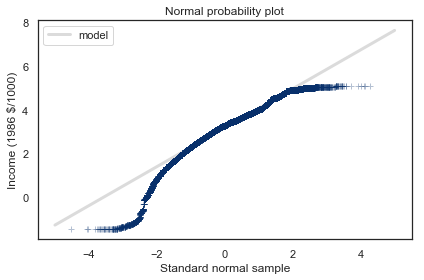

In [23]:
MakeNormalPlot(logIncValues, label="")

decorate(title='Normal probability plot', 
         xlabel='Standard normal sample', 
         ylabel='Income (1986 $/1000)')

7) Here's the complementary CDF on a log-log scale.

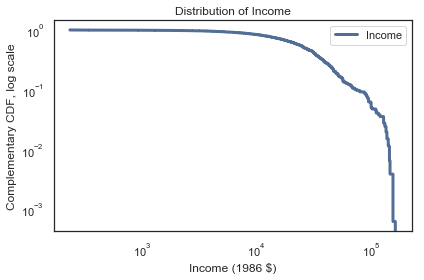

In [24]:
thinkplot.Cdf(cdf_realinc, label="Income", complement=True)

decorate(title='Distribution of Income', 
         xlabel='Income (1986 $)', 
         ylabel='Complementary CDF, log scale',
         yscale='log',
         xscale="log")

8) Here's a test to see whether the values are well-modeled by a Weibull distribution.

Interpretation:

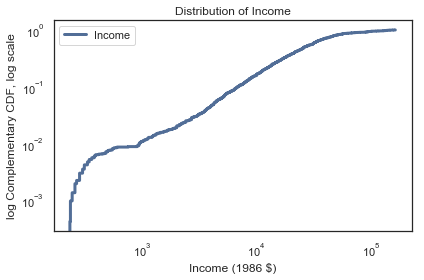

In [26]:
thinkplot.cdf(cdf_realinc, label='Income', transform='Weibull')

decorate(title='Distribution of Income', 
         xlabel='Income (1986 $)', 
         ylabel='log Complementary CDF, log scale',
         xscale='log',
         yscale='log')

Daphka: Through analyzing the different graphs, I'm assuming that the data comes from a log normal distribution. From looking at the values through a log-x scale you can truly see the data takes the sigmoid shape and the CCDF on a log-y seems to be linear. Thus, I would conclude a lognormal distribution.

## BRFSS


In [27]:
%time brfss = pd.read_hdf('brfss.hdf5', 'brfss')
brfss.head()

CPU times: user 14 ms, sys: 12 ms, total: 26 ms
Wall time: 70.6 ms


,SEX,HTM4,WTKG3,INCOME2,_LLCPWT,_AGEG5YR,AGE
96230,2.0,160.0,60.33,8.0,1398.525290,6.0,46.0
244920,2.0,163.0,58.97,5.0,84.057503,13.0,83.0
57312,2.0,163.0,72.57,8.0,390.248599,5.0,43.0
32573,2.0,165.0,74.84,1.0,11566.705300,3.0,30.0
355929,2.0,170.0,108.86,3.0,844.485450,3.0,30.0


Let's look at the distribution of height in the BRFSS dataset.  Here's the CDF.

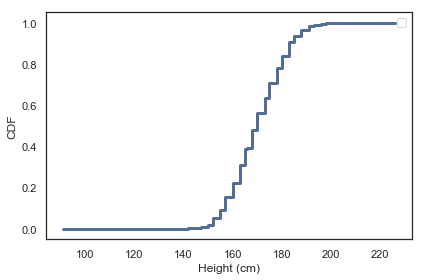

In [28]:
heights = brfss.HTM4

cdf_heights = Cdf(heights)
thinkplot.Cdf(cdf_heights)

decorate(xlabel='Height (cm)', ylabel='CDF')

To see whether a normal model describes this data well, we can use KDE to estimate the PDF.

In [29]:
from scipy.stats import gaussian_kde

Here's an example using the default bandwidth method.

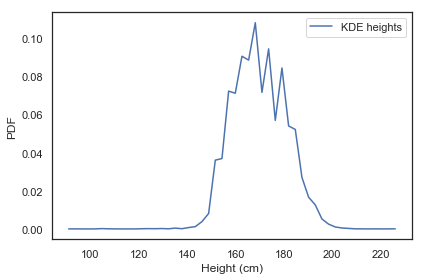

In [30]:
kde = gaussian_kde(heights.dropna())

xs = np.linspace(heights.min(), heights.max())
ds = kde.evaluate(xs)
ds /= ds.sum()

plt.plot(xs, ds, label='KDE heights')

decorate(xlabel='Height (cm)', ylabel='PDF')

It doesn't work very well; we can improve it by overriding the bandwidth with a constant.

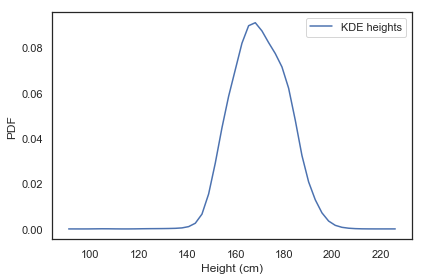

In [31]:
kde = gaussian_kde(heights.dropna(), bw_method=0.3)

ds = kde.evaluate(xs)
ds /= ds.sum()

plt.plot(xs, ds, label='KDE heights')

decorate(xlabel='Height (cm)', ylabel='PDF')

Now we can generate a normal model with the same mean and standard deviation.

In [32]:
mean = heights.mean()
std = heights.std()

mean, std

(170.09044280714292, 10.795080237191394)

Here's the model compared to the estimated PDF.

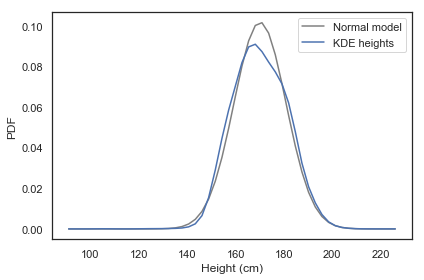

In [33]:
normal_pdf = thinkstats2.NormalPdf(mean, std)

ps = normal_pdf.Density(xs)
ps /= ps.sum()

plt.plot(xs, ps, color='gray', label='Normal model')
plt.plot(xs, ds, label='KDE heights')

decorate(xlabel='Height (cm)', ylabel='PDF')

The data don't fit the model particularly well, possibly because the distribution of heights is a mixture of two distributions, for men and women.

**Exercise:** Generate a similar figure for just women's heights and see if the normal model does any better.

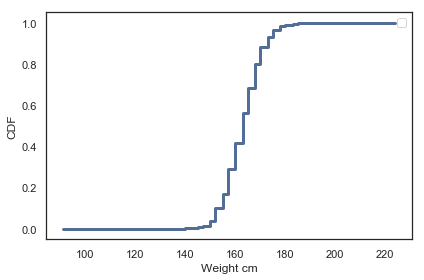

In [34]:
femaleHeights = brfss[brfss.SEX==2]["HTM4"].dropna()
femaleHeightsMean, femaleHeightsStd = femaleHeights.mean(), femaleHeights.std()
femaleHeightsCdf = thinkstats2.Cdf(femaleHeights)
thinkplot.Cdf(femaleHeightsCdf)
decorate(xlabel = "Weight cm", ylabel= "CDF")

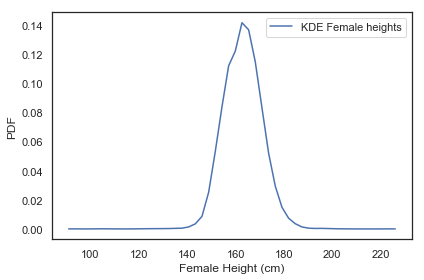

In [35]:
kde = gaussian_kde(femaleHeights, bw_method=0.3)

ds = kde.evaluate(xs)
ds /= ds.sum()

plt.plot(xs, ds, label='KDE Female heights')

decorate(xlabel='Female Height (cm)', ylabel='PDF')

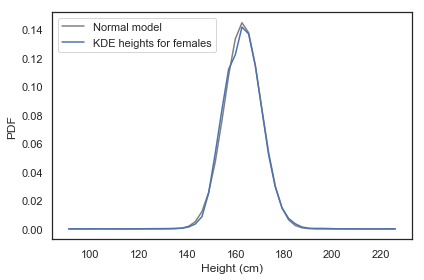

In [36]:
normal_pdf = thinkstats2.NormalPdf(femaleHeightsMean, femaleHeightsStd)

ps = normal_pdf.Density(xs)
ps /= ps.sum()

plt.plot(xs, ps, color='gray', label='Normal model')
plt.plot(xs, ds, label='KDE heights for females')

decorate(xlabel='Height (cm)', ylabel='PDF')

Daphka: As can be seen, the KDE estimates the PDF of the data almost the same as the normal curve using the same mean and standard deviation.

**Exercise:** Generate a similar figure for men's weights, `brfss.WTKG3`.  How well does the normal model fit?

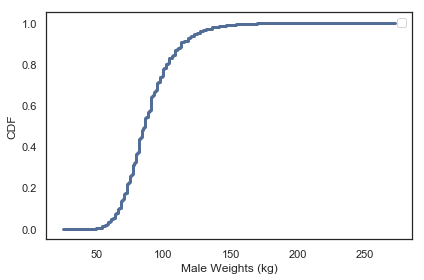

In [40]:
maleWeights = brfss[brfss.SEX==1]["WTKG3"].dropna()
maleWeightsMean, maleWeightsStd = maleWeights.mean(), maleWeights.std()
maleWeightsCdf = thinkstats2.Cdf(maleWeights)
thinkplot.Cdf(maleWeightsCdf)
decorate(xlabel="Male Weights (kg)", ylabel="CDF")

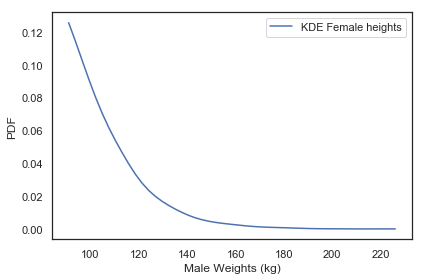

In [38]:
kde = gaussian_kde(maleWeights, bw_method=0.3)

ds = kde.evaluate(xs)
ds /= ds.sum()

plt.plot(xs, ds, label='KDE Female heights')

decorate(xlabel='Male Weights (kg)', ylabel='PDF')

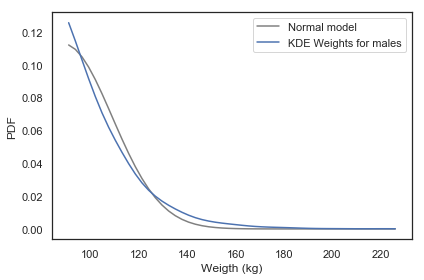

In [39]:
normal_pdf = thinkstats2.NormalPdf(maleWeightsMean, maleWeightsStd)

ps = normal_pdf.Density(xs)
ps /= ps.sum()

plt.plot(xs, ps, color='gray', label='Normal model')
plt.plot(xs, ds, label='KDE Weights for males')

decorate(xlabel='Weigth (kg)', ylabel='PDF')

**Exercise:** Try it one more time with the log of men's weights.  How well does the normal model fit?  What does that imply about the distribution of weight?

1.9383408289484085 0.0932512898752745


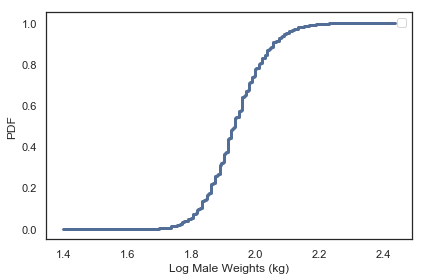

In [41]:
logMaleWeights = np.log10(brfss[brfss.SEX==1]["WTKG3"].dropna())
logMaleWeightsMean, logMaleWeightsStd = logMaleWeights.mean(), logMaleWeights.std()
logMaleWeightsCdf = thinkstats2.Cdf(logMaleWeights)
thinkplot.Cdf(logMaleWeightsCdf)
decorate(xlabel = "Log Male Weights (kg)", ylabel = "PDF")
print(logMaleWeightsMean, logMaleWeightsStd)

xs: [1.12029280e-01 1.09367257e-01 1.04788091e-01 9.85383682e-02
 9.09426562e-02 8.23756271e-02 7.32316236e-02 6.38950807e-02
 5.47148248e-02 4.59844963e-02 3.79303356e-02 3.07065318e-02
 2.43974074e-02 1.90250331e-02 1.45604901e-02 1.09369291e-02
 8.06275814e-03 5.83365440e-03 4.14253886e-03 2.88709661e-03
 1.97480798e-03 1.32573664e-03 8.73491083e-04 5.64844004e-04
 3.58482039e-04 2.23293000e-04 1.36505971e-04 8.19024732e-05
 4.82293286e-05 2.78736759e-05 1.58105183e-05 8.80170477e-06
 4.80901707e-06 2.57878224e-06 1.35719376e-06 7.01032037e-07
 3.55387958e-07 1.76822034e-07 8.63453365e-08 4.13818804e-08
 1.94648197e-08 8.98585448e-09 4.07133846e-09 1.81043886e-09
 7.90131454e-10 3.38441544e-10 1.42277693e-10 5.87027969e-11
 2.37711177e-11 9.44733340e-12]


/Users/daphka/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


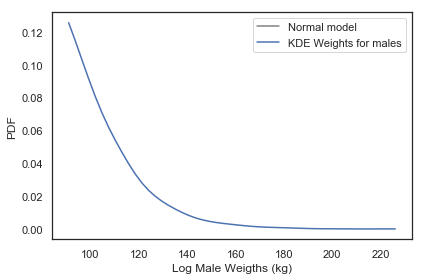

In [42]:
normal_pdf = thinkstats2.NormalPdf(logMaleWeightsMean, logMaleWeightsStd)
print("xs:", ps)
ps = normal_pdf.Density(xs)
ps /= ps.sum()

plt.plot(xs, ps, color='gray', label='Normal model')
plt.plot(xs, ds, label='KDE Weights for males')

decorate(xlabel='Log Male Weigths (kg)', ylabel='PDF')

Daphka: Not sure why the normal model is not showing up. Based on the results of the distributions, I will say that it seems like the weights of the distribution fits more like the log normal distribution.

## Skewness

Let's look at the skewness of the distribution of weights for men and women.

In [43]:
male = (brfss.SEX == 1)
male_weights = brfss.loc[male, 'WTKG3']

In [44]:
female = (brfss.SEX == 2)
female_weights = brfss.loc[female, 'WTKG3']

As we've seen, these distributions are skewed to the right, so we expect the mean to be higher than the median. 

In [45]:
male_weights.mean(), male_weights.median()

(88.83871202341662, 86.18)

We can compute the moment-based sample skewness using Pandas or `thinkstats2`.  The results are almost the same.

In [46]:
male_weights.skew(), thinkstats2.Skewness(male_weights.dropna())

(1.2607915291363547, 1.2607508370740947)

But moment-based sample skewness is a terrible statistic!  A more robust alternative is Pearson's median skewness:

In [47]:
thinkstats2.PearsonMedianSkewness(male_weights.dropna())

0.3961356157532533

**Exercise:** Compute the same statistics for women.  Which distribution is more skewed?

In [48]:
female_weights.mean(), female_weights.median()

(73.6243871435631, 70.31)

In [49]:
female_weights.skew(), thinkstats2.Skewness(female_weights.dropna())

(1.3693028811523575, 1.3692590742841042)

In [50]:
thinkstats2.PearsonMedianSkewness(female_weights.dropna())

0.5268415056705406

Daphka: By the sign of the Pearson Median Skewness, we can confirm that the data is positively skewed while it's a more robust statistics as compared to the sample skewness measurement. In comparing the two values, by the magnitude of the two values, female weights are more skewed than male weights.

**Exercise:** Explore the GSS or BRFSS dataset and find something interesting!

In [51]:
brfss.columns

Index(['SEX', 'HTM4', 'WTKG3', 'INCOME2', '_LLCPWT', '_AGEG5YR', 'AGE'], dtype='object')

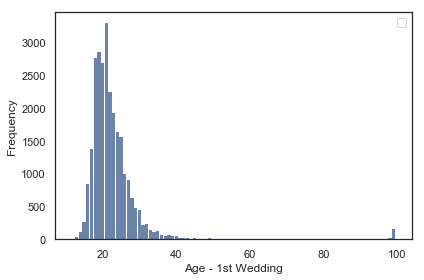

In [52]:
ageWed = gss[gss["agewed"]!=0]["agewed"].dropna()
ageWedHist = thinkstats2.Hist(ageWed)
thinkplot.Hist(ageWedHist)
decorate(xlabel = "Age - 1st Wedding", ylabel = "Frequency")

Daphka: As can be observed in the Histogram for the variable agewed, it seems like there's a longer tail in the right, so we expect the data to be right-skewed with a median less than the mean.

In [53]:
ageWed.mean(), ageWed.median()

(22.675400181214133, 21.0)

In [54]:
ageWed.skew(), thinkstats2.Skewness(ageWed)

(6.445641987713814, 6.445276969024723)

In [55]:
thinkstats2.PearsonMedianSkewness(ageWed)

0.6334306011597864

n, mean, std 26488 22.1287750385208 4.4090208386043654


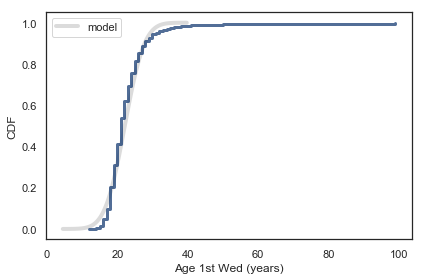

In [56]:
ageWedCdf = thinkstats2.Cdf(ageWed)
MakeNormalModel(ageWed, label="")
decorate(xlabel = "Age 1st Wed (years)", ylabel="CDF")

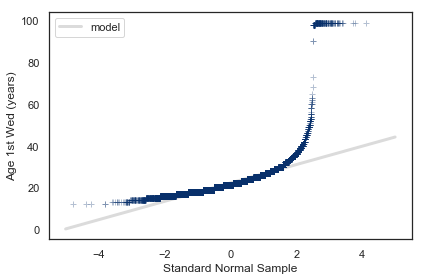

In [57]:
MakeNormalPlot(ageWed, label="")
decorate(xlabel = "Standard Normal Sample", ylabel= "Age 1st Wed (years)")

Daphka: As could be observed from the histogram, the age 1st wed is slightly skewed looks unimodal and has a bell-shaped curve like the standard normal, already a sign that this data is probably normal. Plotting against the normal model, it can be observed the CDF sits really well on the model and the normal probabily plot confirms that. Using the empirical rule, we can see in the normal probability plot that most of the data is saturated and fits the line between (-2,2) standard deviation from the mean, which corresponds to about 97% of the dataset. The tail behaviors represent people who were either married too early or late in their life making them somewhat of an outlier to the rest of the data.